In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline




### NETFLIX

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании мне предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


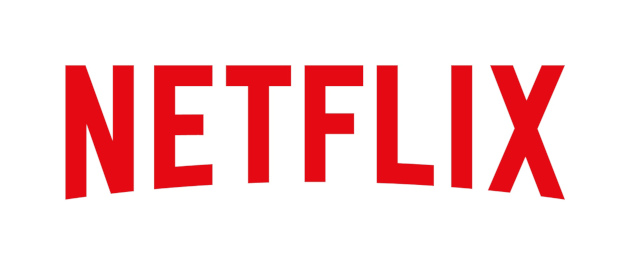

Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.


In [2]:
data = pd.read_csv('netflix_data.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']


Удалим из данных дубликаты. Сколько объектов удалено?

In [3]:
size_with_duples = len(data)
data.drop_duplicates(inplace=True)
size_with_duples - len(data)


500

Сколько объектов осталось?

In [4]:
len(data)


500

Сколько рейтинговых групп представлено в данных?

In [5]:
len(data.rating.drop_duplicates())


13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.


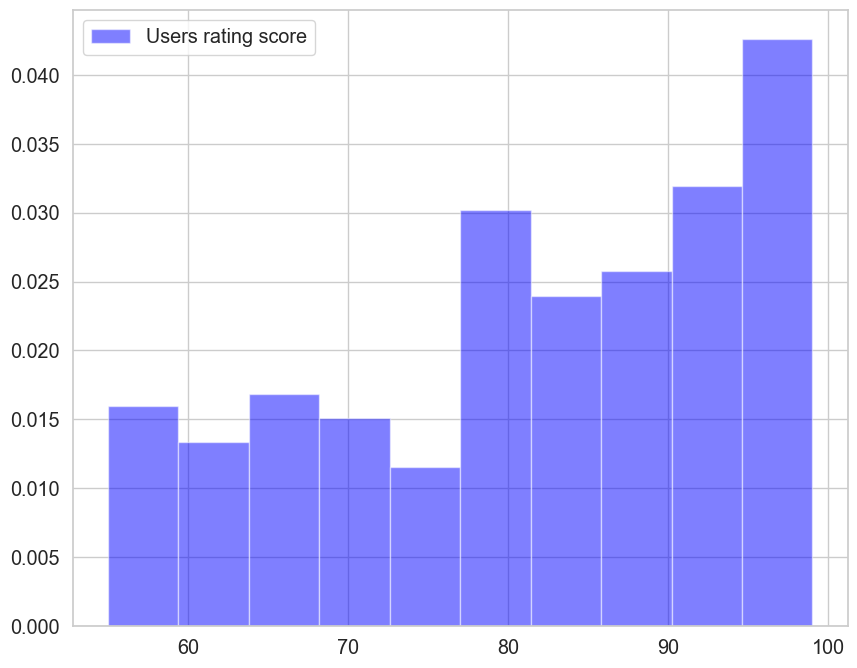

In [6]:
plt.figure(figsize=(10,8))
plt.hist(
    data['user rating score'],
    bins=10,
    density=True,
    alpha=0.5,
    color='blue',
    label='Users rating score')

plt.legend()
plt.show()


In [7]:
data['user rating score'].mean()


81.3984375

**Вывод:** средний зрительский балл - 81, но по гистограмме видно, что большинство оценок не менее 90. Продукты компании высоко ценятся у зрителей.

Выведим основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. 

In [8]:
data['user rating score'].describe()


count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

**Комментарий:** Медиана и среднее отличаются. Медиана и среднее могут значительно отличаться, т.к. медиана более устойчива к выбросам.

В какие годы были запущены шоу, представленные в датасете?

In [9]:
sorted(data['release year'].drop_duplicates())


[1940,
 1976,
 1978,
 1982,
 1986,
 1987,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

Построим график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

<Axes: xlabel='release year'>

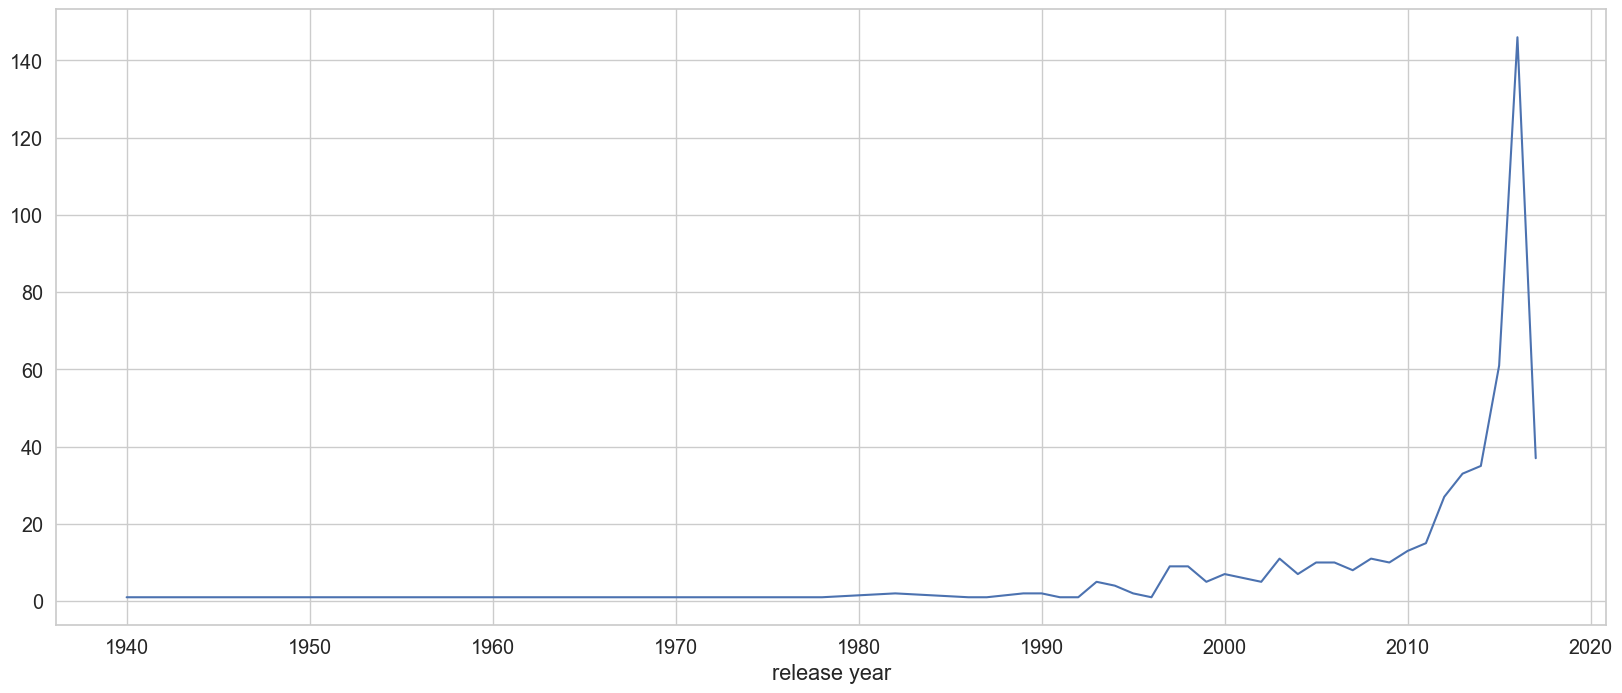

In [10]:
plt.figure(figsize=(20, 8))
data.groupby('release year').count().title.plot()


**Вывод:** количество запущенных шоу начало возрастать в середине 1990-го десятилетия, отмечаю взрывной рос в середине 2010-го десятилетия. Скорее всего рост наблюдается благодаря переходу на стриминговый сервис. 

Сравним среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
Ответить на этот вопрос мне поможет график, который я построил выше.

In [12]:
data.groupby('release year').count().title.tail()


release year
2013     33
2014     35
2015     61
2016    146
2017     37
Name: title, dtype: int64

**Вывод:** 2017 выдался более успешным для компании. Однако мы можем наблюдать резкое падение количества выпускаемых шоу..

<Axes: xlabel='rating'>

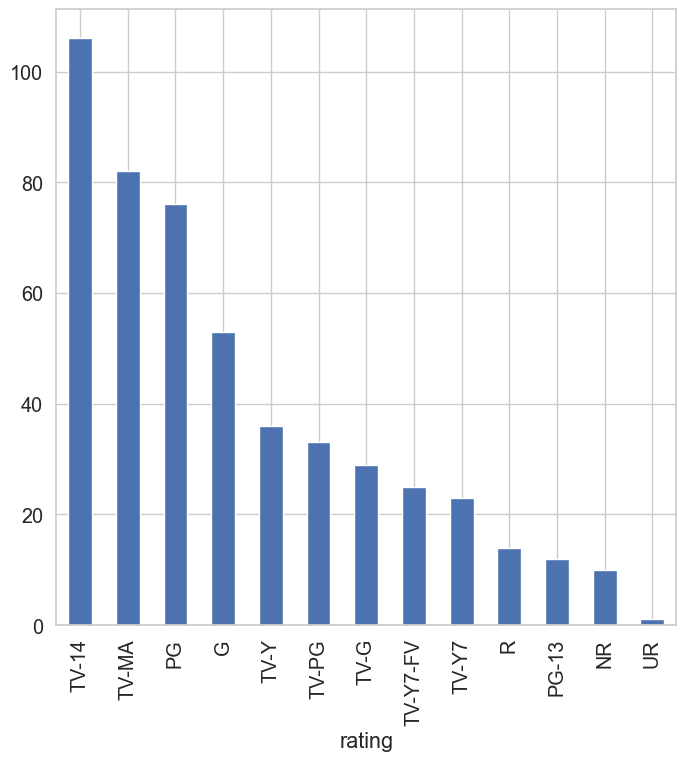

In [13]:
data.groupby('rating').size().sort_values(
    ascending=False).plot(
    kind='bar',
    figsize=(8, 8),  
    label='rating')


**Вывод:** видим, что большинство шоу категории TV-14. Наиболее выпускаемыми являются шоу для подростков.

Составим топ-13 самых высоко оцененных шоу. Выберем из данного топа шоу, которое наиболее нравится. Обозначим это шоу N.
Ответим на следующие вопросы:  
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [14]:
data.sort_values('user rating score', ascending=False).head(13)


,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
350,Lost,TV-14,Parents strongly cautioned. May be unsuitable ...,2010,98.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0


Взял "Family Guy", категория - "TV-MA", год выпуска - 2015, средняя оценка  - 98.0

In [15]:
print('Худшее по оценкам шоу, категории TV-MA - ', 
      data[data.rating == 'TV-MA'].sort_values(
          by='user rating score').dropna().head(1).title)


Худшее по оценкам шоу, категории TV-MA -  380    Bitten
Name: title, dtype: object


In [16]:
print("Шоу выпущенных в одном году с Family Guy -",
      len(data[data['release year'] == 2015]))


Шоу выпущенных в одном году с Family Guy - 61


Ответим на следующие вопросы при помощи `boxplot`:
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет? 
* Как менялись оценки пользователей с течением времени? Построим `boxplot` для каждого десятилетия.

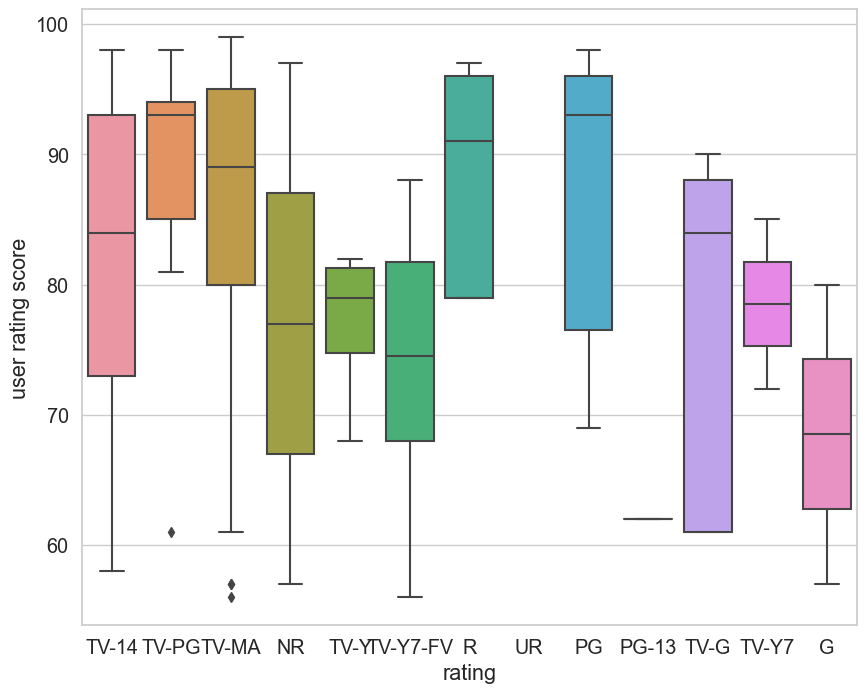

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(
    x='rating', 
    y='user rating score', 
    data=data[data['release year'] > 2012]);


**Вывод:** За последние 5 лет (начал с 2012, т.к. последние данные датируются 2017) наивысшый рейтинг имели шоу категорий TV-PG, PG и R.

<Axes: xlabel='release year', ylabel='user rating score'>

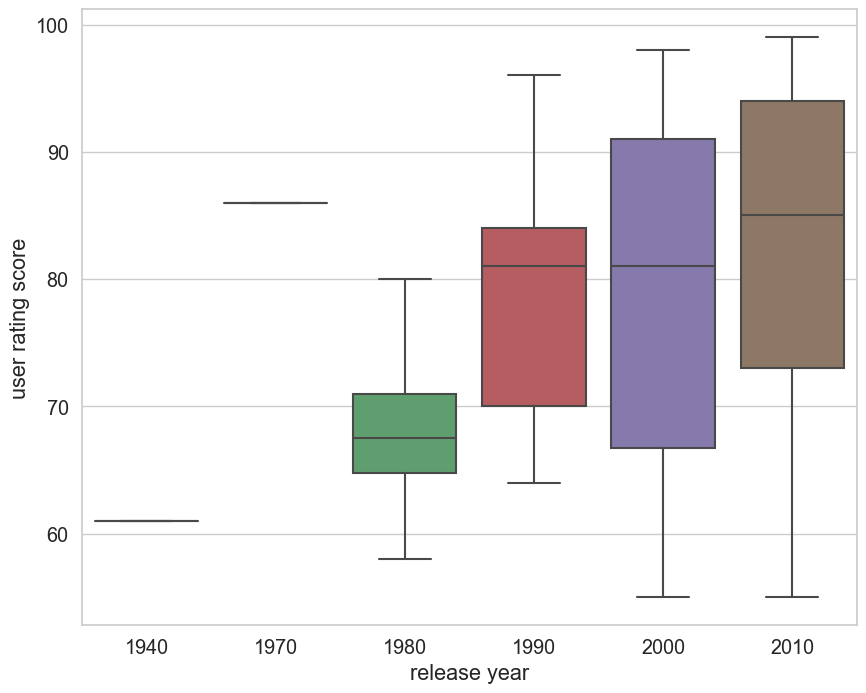

In [19]:
tmp = data
tmp['release year'] = data['release year'] - data['release year'] % 10
plt.figure(figsize=(10,8))
sns.boxplot(
    x='release year',
    y='user rating score',
    data=tmp)


**Вывод:** Видим, что начиная с 1980-ых рейтинги постоянно растут, а также можно отметить снижение скорости роста рейтингов.